In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

In [2]:
#Constants [L] = AU, [T] = years, [M] = solar mass 
G = 1.; M = 1.; c = 1.;
Rs = 2*G*M/(c**2)

In [3]:
def f(t0, q0):
    t=q0[0]; r=q0[1]; theta=q0[2]; phi=q0[3]
    dt=q0[4]; dr=q0[5]; dtheta=q0[6]; dphi=q0[7]
    f = np.zeros(8)
    f[0] = dt
    f[1] = dr
    f[2] = dtheta
    f[3] = dphi    
    f[4] = -2*G*M*dr*dt/(r*(r-2*G*M))
    f[5] = -G*M*dt**2*(r-2*G*M)/(r**3)+G*M*dr**2/(r*(r-2*G*M))+(r-2*G*M)*(dtheta**2+(np.sin(theta)*dphi)**2)
    f[6] = -2*dtheta*dr/r+np.sin(theta)*np.cos(theta)*dphi**2
    f[7] = -2*(dphi*dr/r+np.cos(theta)*dtheta*dphi/np.sin(theta))
    return f

In [4]:
def eff_potential(r,epsilon,L):
    return (1 - 2*G*M/r)*(L**2/r**2 + epsilon)

In [5]:
T = 1000000. # GM/c^3
t0 = 0
tf = 1*T
n = 1000000

t = np.linspace(t0,tf,n)
h = (tf - t0)/n

Q = np.zeros([n,8])

In [6]:
L0 = np.sqrt(12)*5.; eps = np.sqrt(1-12/L0**2); r0 =  1000.#L0**2*(1+eps)/2 
#r0 = L0*(L0-np.sqrt(L0**2-12))/2
E0 = np.sqrt(eff_potential(r0,1.,L0))
dr0 = np.sqrt(E0**2-eff_potential(r0,1.,L0))
dt0 = E0/(1-2*G*M/r0); dphi0 = L0/(r0**2)
Q[0,0] = t0
Q[0,1] = r0
Q[0,2] = np.pi*0.5
Q[0,3] = 0.

Q[0,4] = dt0
Q[0,5] = dr0
Q[0,6] = 0.
Q[0,7] = dphi0

In [7]:
E0**2-eff_potential(r0,1.,L0)

1.1102230246251565e-16

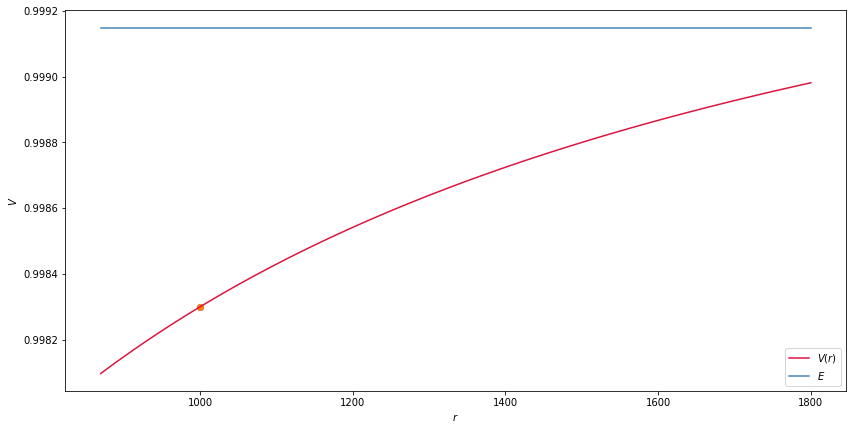

In [8]:
r = np.linspace(r0-130,r0+800,100)
#V = eff_potential(r,1.,L0)
plt.figure(figsize=(14,7))
#plt.plot(r,np.zeros(len(r)),color='black')
plt.plot(r,eff_potential(r,1.,L0),color='crimson',label=f'$V(r)$')
plt.plot(r,E0*np.ones(len(r)),color='steelblue',label='$E$')
plt.scatter(r0,eff_potential(r0,1.,L0),marker='o')
plt.scatter(1000,eff_potential(1000,1.,L0),marker='o')
plt.xlabel('$r$')
plt.ylabel('$V$')
plt.legend()
plt.show()

In [9]:
%%time
for i in range(1,n):
    q0 = Q[i-1]
    Q[i] = RK4(f, h, 0, q0)
    if Q[i,1] <= Rs:
        print('chocó!')
        break
    

CPU times: user 2min 36s, sys: 1.07 s, total: 2min 37s
Wall time: 2min 36s


/home/usuario/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


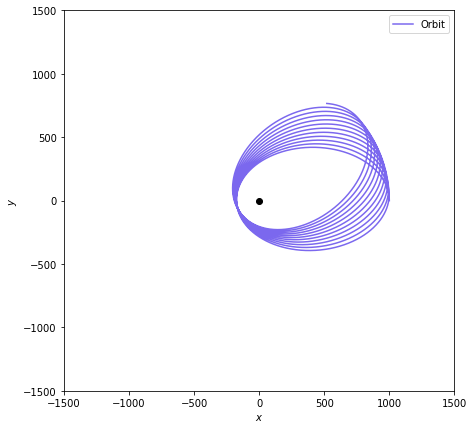

In [10]:
tc=n-1
x = Q[0:tc,1]*np.cos(Q[0:tc,3])*np.sin(Q[0:tc,2])
y = Q[0:tc,1]*np.sin(Q[0:tc,3])*np.sin(Q[0:tc,2])
ang = np.linspace(0,2*np.pi,100)
plt.figure(figsize=(7,7))
plt.plot(x, y, color = 'mediumslateblue',label = 'Orbit')
plt.plot(Rs*np.cos(ang),Rs*np.sin(ang),color='black')
plt.scatter(0,0,marker='o',color='black')
plt.xlim([-r0*1.5,r0*1.5])
plt.ylim([-r0*1.5,r0*1.5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [11]:
Q[n-1,1]-Q[0,1]

-74.7865228983485